In [1]:
# Import required libraries

In [15]:
from nsepy import get_history as gh

In [2]:
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
#2. We will fetch 6 years of historical prices of SBIN from 01.01.2013 to 31.12.2018. So we need to set the start and end dates and pass these parameters to the function for fetching the data.

In [17]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)

In [18]:
stk_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-01-01,SBIN,EQ,2385.50,2404.9,2434.05,2397.55,2425.3,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
2013-01-02,SBIN,EQ,2426.45,2450.0,2464.00,2438.15,2451.9,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2013-01-03,SBIN,EQ,2450.55,2460.0,2482.40,2436.20,2470.7,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
2013-01-04,SBIN,EQ,2471.60,2460.0,2492.95,2450.65,2490.0,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
2013-01-07,SBIN,EQ,2486.70,2490.0,2499.00,2461.75,2465.0,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628


In [19]:
#3. We can visualise the fetched data in the above step. For simplicity, only the day-wise closing prices are visualised.

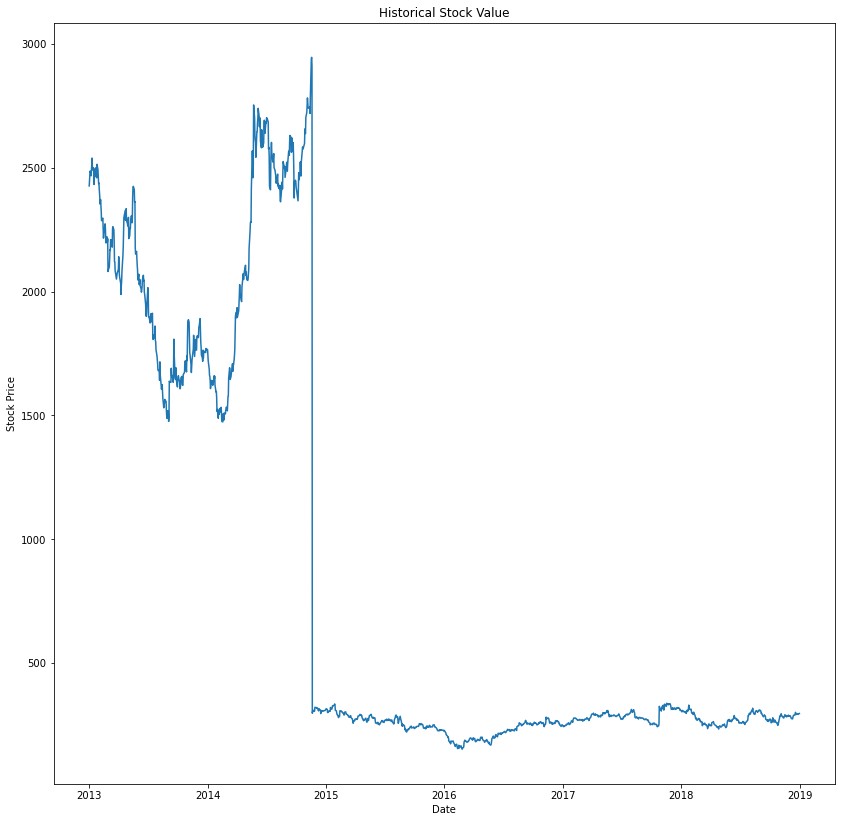

In [20]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [21]:
#4.4. There are 12 columns in the fetched data. Many of the columns are not of our interest so only significant columns are selected to create the main dataset.

In [22]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [23]:
data2.head()

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,2013-01-01,2404.9,2434.05,2397.55,2426.45
2013-01-02,2013-01-02,2450.0,2464.00,2438.15,2450.55
2013-01-03,2013-01-03,2460.0,2482.40,2436.20,2471.60
2013-01-04,2013-01-04,2460.0,2492.95,2450.65,2486.70
2013-01-07,2013-01-07,2490.0,2499.00,2461.75,2467.60


In [7]:
#5. Preprocess the data in order to prepare it for the LSTM model. The data fetched in step one is used for training purpose only. For testing purpose, different data will be fetched later.

In [26]:
train_set = data2.iloc[:, 1:2].values # we are taking 'Open' values only
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
#6.Define the LSTM Recurrent Neural Network. Here, you can add more LSTM layers and adjust the dropout in order to improve the accuracy of the model.

In [31]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

#7.Compile and train the model defined in the above step. Iteratively, you can increase or decrease the epochs and batch size to get more accuracy.

In [32]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0282
Epoch 2/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0083
Epoch 3/15
1422/1422 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 4/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0064
Epoch 5/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0059
Epoch 6/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0060
Epoch 7/15
1422/1422 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 8/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0053
Epoch 9/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0054
Epoch 10/15
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0043
Epoch 11/15
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0044
Epoch 12/15
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0038
E

#Now, our model is trained and needs to be tested on the testing data. For this purpose, fetch the new data for a different period. Preprocessing steps are similar as we have done with training data.

In [33]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
len(dataset_total),len(testdata),len(inputs)

(1659, 176, 236)

In [40]:
len(X_test)

175

In [34]:
# 9. Test the LSTM model on the new dataset.

In [35]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [36]:
#10. Visualize the predicted stock prices with original stock prices.

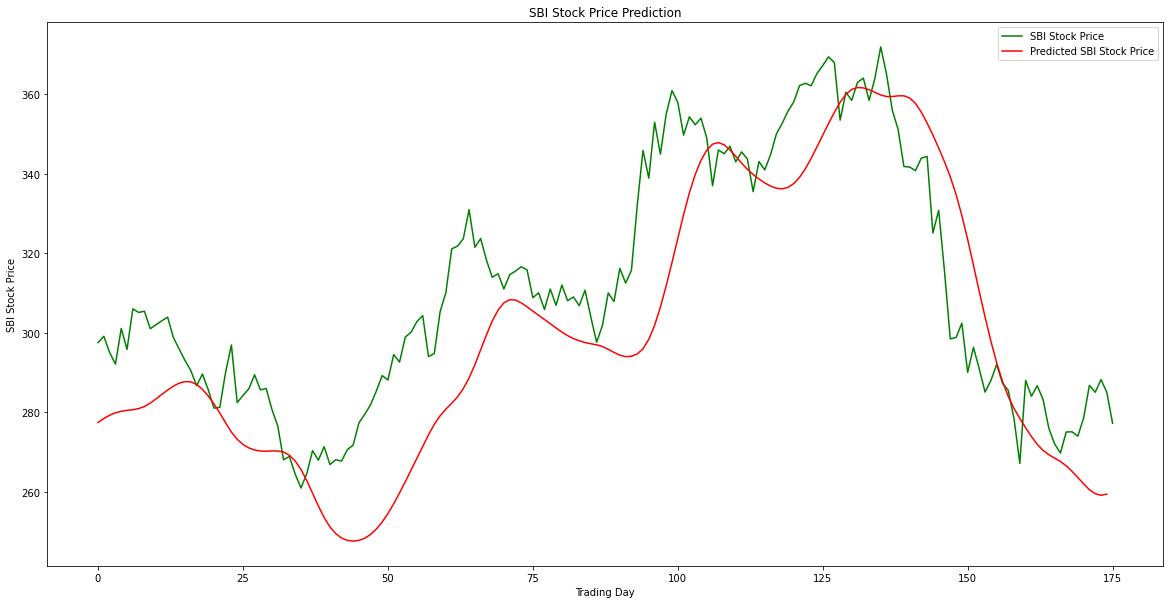

In [37]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()